In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# 6.S077 Problem Set 1

## Problem 1-2.

In [2]:
df = pd.read_csv('data_2d.csv', header=None)

### Part D

The maximum likelihood estimate has the form,

$$ \hat{\theta}_{ML} = \frac{n}{x_1 + x_2 + \ldots + x_n} $$

In [3]:
hat_theta_ml = len(df[0]) / np.sum(df[0])

In [4]:
hat_theta_ml

2.623542901104986

The estimate from the first moment has the same form as the maximum likelihood estimate,

$$ \hat{\theta}_1 = \frac{n}{x_1 + x_2 + \ldots + x_n} $$

In [5]:
hat_theta_1 = len(df[0]) / np.sum(df[0])

In [6]:
hat_theta_1

2.623542901104986

The estimate from the second moment has the form,

$$ \hat{\theta}_2 = \sqrt{\frac{2n}{x_1^2 + x_2^2 + \ldots + x_n^2}} $$

In [7]:
hat_theta_2 = np.sqrt((2 * len(df[0])) / np.sum(df[0] ** 2))

In [8]:
hat_theta_2

2.8650511519588524

The estimate from the median feature matching has the form,

$$ \hat{\theta}_m = \frac{\ln 2}{\hat{a}} $$

In [9]:
hat_theta_m = np.log(2) / np.median(df[0])

In [10]:
hat_theta_m

2.4866175374041273

## Problem 1-3.

In [11]:
df = pd.read_csv('crab_data.csv')

### Part B

The maximum likelihood estimate for $\mu$ is of the form,

$$ \hat{\mu} = \frac{1}{n} \sum_{i = 1}^n x_i $$

In [12]:
hat_mu = np.sum(df['ratio']) / len(df['ratio'])

In [13]:
hat_mu

0.6467528146897313

The maximum likelihood estimate for $v$ is of the form,

$$ \hat{v} = \frac{1}{n} \sum_{i = 1}^n (x_i - \hat{\mu})^2 $$

In [14]:
hat_v = np.sum((df['ratio'] - hat_mu) ** 2) / len(df['ratio'])

In [15]:
hat_v

0.00036264831635595573

Now we generate a sample from the estimated normal distribution.

In [16]:
sample = np.random.normal(hat_mu, np.sqrt(hat_v), len(df['ratio']))

We can now compare the histograms of the synthetic sample distribution and the original distribution.

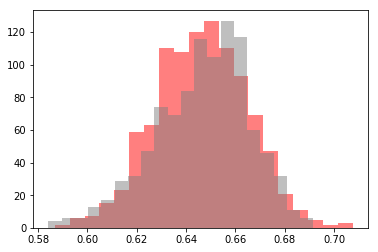

In [17]:
_ = plt.hist(sample, 20, color='red', alpha=0.5)
_ = plt.hist(df['ratio'], 20, color='grey', alpha=0.5)

The plots seem to line up--for the most part. However, there is a slight lack of symmetry in the original data that is not accurately accounted for in the simulated distribution. This hints that the original data might not be normally distributed.

### Part E

The provided parameters given from the EM-algorithm are,

$$ \hat{\lambda} = 0.648536,\quad \hat{\mu}_1 = 0.656405,\quad \hat{v}_1 = 0.000156 $$

$$ \hat{\mu}_2 = 0.628942,\quad \hat{v}_2 = 0.000256 $$

In [18]:
hat_lambda = 0.648536
hat_mu_1 = 0.656405
hat_v_1 = 0.000156
hat_mu_2 = 0.628942
hat_v_2 = 0.000256

The mixture of models is defined by,

$$ f_{X_i}^\theta(x_i) = \frac{\lambda}{\sqrt{2 \pi v_1}} e^{-(x_i - \mu_1)^2 
/ 2 v_1} + \frac{1 - \lambda}{\sqrt{2 \pi v_2}} e^{-(x_i - \mu_2)^2 / 2 v_2} $$

In [19]:
sample_a = np.random.normal(hat_mu_1, np.sqrt(hat_v_1), len(df['ratio']))
sample_b = np.random.normal(hat_mu_2, np.sqrt(hat_v_2), len(df['ratio']))

sample = np.zeros(len(df['ratio']))

for i in range(len(df['ratio'])):
    
    which = np.random.binomial(1, 1 - hat_lambda)
    
    if which == 0:
        sample[i] = sample_a[i]
    elif which == 1:
        sample[i] = sample_b[i]

We can now plot the mixure model against the original data.

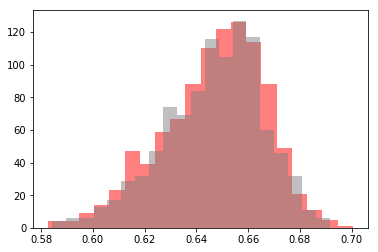

In [20]:
_ = plt.hist(sample, 20, color='red', alpha=0.5)
_ = plt.hist(df['ratio'], 20, color='grey', alpha=0.5)

This model appears to work significantly better. It has the appropriate shape including the spread, but, most importantly, it has the slightly skewed maximum.

### Part F

We can use the data to calculate the first five moments according to the formula,

$$ \hat{\mathbb{E}}[X^k] = \frac{1}{n} \sum_{i = 1}^n x_i^k $$

In [21]:
hat_m_1 = np.sum(df['ratio'] ** 1) / len(df['ratio'])
hat_m_2 = np.sum(df['ratio'] ** 2) / len(df['ratio'])
hat_m_3 = np.sum(df['ratio'] ** 3) / len(df['ratio'])
hat_m_4 = np.sum(df['ratio'] ** 4) / len(df['ratio'])
hat_m_5 = np.sum(df['ratio'] ** 5) / len(df['ratio'])

In [22]:
hat_m_1, hat_m_2, hat_m_3, hat_m_4, hat_m_5

(0.6467528146897313,
 0.4186518516254458,
 0.2712299083593256,
 0.17586750292761982,
 0.11412761692520867)